In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline  

from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
sns.set_palette('Blues')

# What places showed an increasing trend of number of visits?

In [4]:
provinces_mobility = pd.read_csv('data/cleaned_data/canada_provinces_mobility.csv')

In [5]:
provinces_mobility.head()

,Unnamed: 0,country_code,country,region_1,date,retail_recreation,grocery_pharmacy,parks,transit,workplaces,residential
0,16900,CA,Canada,Alberta,2020-02-15,7.0,3.0,24.0,7.0,-2.0,-1.0
1,16901,CA,Canada,Alberta,2020-02-16,10.0,-2.0,28.0,3.0,-3.0,-2.0
2,16902,CA,Canada,Alberta,2020-02-17,-7.0,-2.0,10.0,-40.0,-67.0,15.0
3,16903,CA,Canada,Alberta,2020-02-18,-1.0,1.0,-2.0,-9.0,-5.0,2.0
4,16904,CA,Canada,Alberta,2020-02-19,3.0,4.0,21.0,-7.0,-1.0,1.0


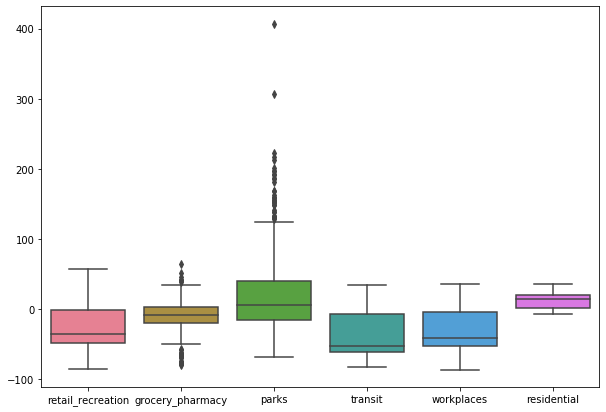

In [6]:
places = ['retail_recreation', 'grocery_pharmacy', 'parks', 'transit', 'workplaces', 'residential']
plt.figure(figsize=(10, 7))
sns.boxplot(data=provinces_mobility[places], palette='husl')

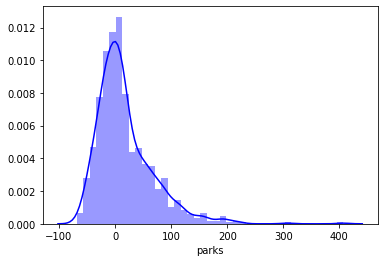

In [7]:
sns.distplot(provinces_mobility['parks'], color='b')

As shown in the boxplot above, people visited parks and residential areas the most. However, the boxplot for parks has the largest standard deviation and there are numerous outliers at the upper end of the boxplot. This means that there are certain days where a large amount of people decided to go to parks. The potential reasons may include nicer weather as we are entering summer, people couldn't bear to stay at home any longer, etc. Residential areas have a small deviation which shows that most people still decided stay at home and did not take the risk to visit random places.

On the other hand, people visited transit stations the least. Public areas are zones that may have a high infection rate. A low median and a large standard deviation and a low median indicates that although people decided to avoid going to transit stations, there may be some individuals who still have to take public transportation to get to work.

## Interesting insight: Does daily percentage change in people going to park correlate with Google search trends for "parks"

In [8]:
# import data
google_trends_park = pd.read_csv('data/cleaned_data/google_trends_park.csv', parse_dates=['date'])
canada_provinces_park = pd.read_csv('data/cleaned_data/canada_provinces_park.csv', parse_dates=['date'])

Text(0.5, 1.0, 'Google Trends vs Canada Mobility Trend for "park"')

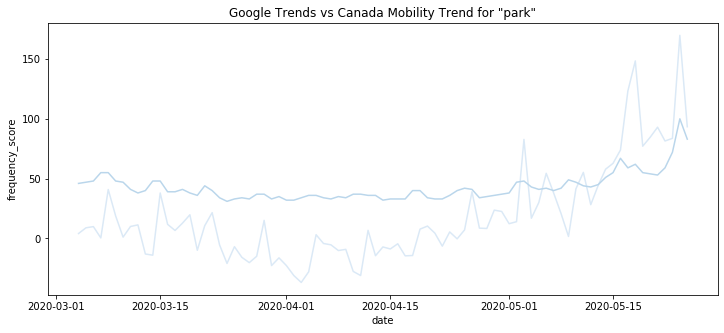

In [14]:
# lineplots 
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='parks', data=canada_provinces_park, palette='Blues-r')
sns.lineplot(x='date', y='frequency_score', data=google_trends_park, palette='Blues-r').\
set_title('Google Trends vs Canada Mobility Trend for "park"')
# set_ylabel('Date')
# plt_parks.set_axis_labels('Date', 'Frequency score/Parks')

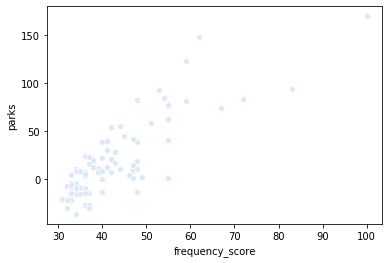

In [10]:
# A scatterplot between Google trends "park" and Canada mobility "park"
sns.scatterplot(x=google_trends_park.frequency_score, y=canada_provinces_park.parks)

In [11]:
np.corrcoef(google_trends_park.frequency_score, canada_provinces_park.parks)[0][1]

0.8271572885280818

Woohoo! The Pearson's correlation coefficient shows that these two variables are positively correlated with each other!

In [12]:
# fit a linear model with OLS
ols_mod = sm.OLS(google_trends_park.frequency_score, canada_provinces_park.parks)
res = ols_mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        frequency_score   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              46.85
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                    1.28e-09
Time:                        11:39:17   Log-Likelihood:                         -413.64
No. Observations:                  83   AIC:                                      829.3
Df Residuals:                      82   BIC:                                      831.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
parks          0.6060      0.089      6.844      0.000       0.430       0.782
==============================================================================
Omnibus:                       21.188   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.023
Skew:                          -1.142   Prob(JB):                     4.98e-07
Kurtosis:                       4.782   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# How do mobility trends vary as time progresses?

# How do mobility trends differ across provinces?